# Síntesis de funciones de excitación no disipativas
<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
Se presentan los métodos de Foster y Cauer para la síntesis de redes no disipativas. Ambos métodos nos permitirán implementar cualquier función de excitación, real y positiva (FRP), en una red eléctrica canónica, es decir, con la menor cantidad posible de componentes.
* Funciones de dibujo de redes: [dibujar_foster_serie](), [dibujar_foster_derivacion](), [dibujar_cauer_LC]()
* Funciones de síntesis de dipolos: [cauer_LC](), [foster]()
* Funciones para presentación de markdown y latex: [print_latex](), [print_subtitle](), [a_equal_b_latex_s]()


### Introducción a las funciones de excitación no disipativas

Una función de excitación que representa una inmitancia (una impedancia ó admitancia) $F(s)$ será no disipativa si cumple que:

* $F(s)=\frac{P(s)}{Q(s)}$ sea una función real positiva (FRP)
* $\Re \{F\}=0$

La primer condición es necesaria para que la inmitancia sea realizable, y se refiere al apéndice E del libro de Santiago Cogollos Borrás para más detalles. La segunda restricción implica que 

$$ F = \frac{m_P}{n_Q} \lor  F = \frac{n_P}{m_Q} $$

siendo $m$ la parte par y $n$ la parte impar de sendos polinomios numerador y denominador (P y Q respect.).

### Un teorema de reactancias (1924): la propuesta de Foster

Queda definir la forma propuesta por Foster en [*A reactance theorem*](https://en.wikipedia.org/wiki/Foster%27s_reactance_theorem):

$$ F(s)=\frac{P(s)}{Q(s)} = \frac{k_0}{s} + k_\infty.s + \sum_{i=1}^N\frac{2.k_i.s}{s^2+\omega_i^2} $$

donde la inmitancia F puede representarse como una suma de términos, o fracciones simples, que individualmente están asociandas a cada elemento circuital de la red. Teniendo la función $F(s)$ N polos finitos, la red resultante de la expansión Foster tendrá $2.N + 2$ componentes. Es decir, los residuos $k$ serán los valores de los componentes, como se observa que $k_0$ y $k_\infty$ serán sendos capacitor e inductor, mientras que cada polo finito cuyo residuo es $k_i$, se asocian a tanques resonantes L-C. Justamente la frecuencia de resonancia de cada tanque será $\omega_i$. En los ejemplos siguientes quedará evidenciada esta asociación.


In [1]:

import sympy as sp

# Ahora importamos las funciones de PyTC2

from pytc2.sintesis_dipolo import foster
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s


In [2]:
# Resolución simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
FF = (2*s**4 + 20*s**2 + 18)/(s**3 + 4*s)

print_latex(a_equal_b_latex_s('F(s)', FF))


<IPython.core.display.Math object>

In [3]:
# Se expande FF a la Foster
k0, koo, ki_wi, _, FF_foster = foster(FF)

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1 = \left[ \frac{1}{ \frac{1}{s. \frac{\omega_i^2}{2.k_i} } + s . \frac{1}{2.k_i} } \right]  = \
                                             \left[ \frac{1}{ \frac{k_0}{s} + s . k_\infty } \right] = \
                                             \left[ k_0, k_\infty \right] = \
                                       \left[ \
                                             \left[ \frac{\omega_1^2}{2k_1}, \frac{1}{2k_1} \right] \
                                       \right]', ki_wi ))

print_latex(a_equal_b_latex_s('k_\infty', koo))


print_latex(a_equal_b_latex_s(a_equal_b_latex_s('F(s)', FF)[1:-1], FF_foster ))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Luego queda solo implementar la inmitancia como impedancia o admitancia. Para ello se dispone de funciones de dibujo de redes:

#### Foster serie

<IPython.core.display.Math object>

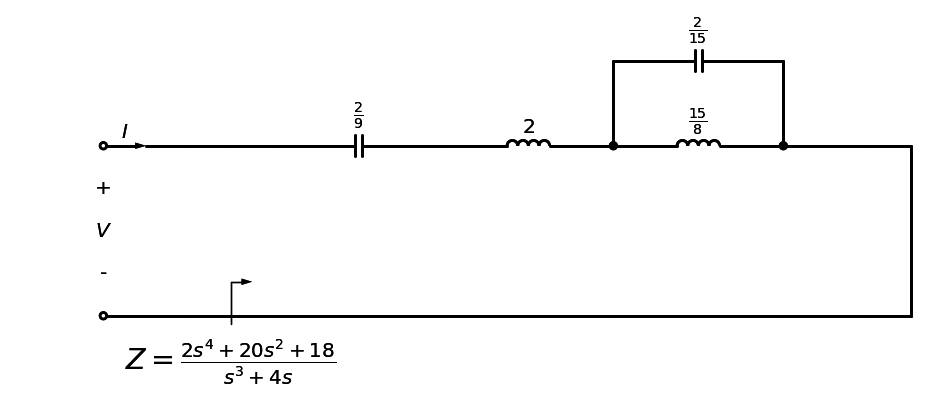

In [4]:
print_subtitle('Foster serie')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z(s)=F(s)', FF)[1:-1], FF_foster ))

# Tratamos a nuestra función imitancia como una Z
dibujar_foster_serie(k0, koo, ki_wi, z_exc = FF)




Como se puede ver, la suma de términos simples, resulta en que cada término será una impedancia asociada en serie. Luego si se asume F(s) como admitancia Y(s), la red resultante estará asociada en paralelo.

#### Foster derivación

<IPython.core.display.Math object>

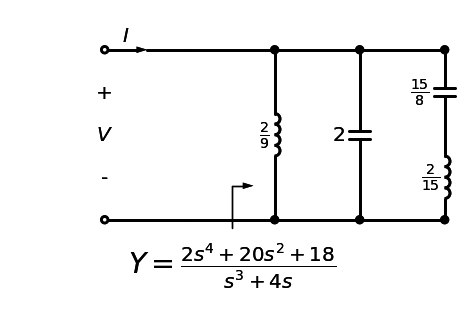

In [5]:
print_subtitle('Foster derivación')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y(s)=F(s)', FF)[1:-1], FF_foster ))

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_derivacion(k0, koo, ki_wi, y_exc = FF)



Como puede verse, el método de Foster da lugar a redes con $2.1 + 2 = 4$ componentes reactivos en ambos casos. Se dice que es un método **canónico** dado que 4 es la menor cantidad de componentes con la que la función F(s) puede ser implementada con elementos pasivos.


### Expansión en fracciones continuas: Método de Cauer

Del mismo modo que el método de Foster se sutenta en la expansión en fracciones simples, el de Cauer consiste en la expansión en [fracciones continuas](https://en.wikipedia.org/wiki/Network_synthesis#Cauer_synthesis). Con la salvedad que puede representarse la expansión mediante residuos $k_0$ y $k_\infty$.

$$ F(s)= \frac{k_0}{s} + \frac{1}{ \frac{k_1}{s} + \frac{1}{ \frac{k_2}{s} + \cdots } } = 
         k_{\infty,1}.s + \frac{1}{ k_{\infty,2}.s + \frac{1}{ k_{\infty,3}.s + \cdots } } $$

en este caso cualquiera de ambas expansiones da lugar a redes escalera, por ejemplo si se tratara de una impedancia:

$$ Z(s)= \frac{1}{s.C_1} + \frac{1}{ \frac{1}{s.L_1} + \frac{1}{ \frac{1}{s.C_2} + \cdots } } = 
         s.L_1 + \frac{1}{ s.C_1 + \frac{1}{ s.L_2 + \cdots } } $$

o de una admitancia:

$$ Y(s)= \frac{1}{s.L_1} + \frac{1}{ \frac{1}{s.C_1} + \frac{1}{ \frac{1}{s.L_2} + \cdots } } = 
         s.C_1 + \frac{1}{ s.L_1 + \frac{1}{ s.C_2 + \cdots } } $$

se ve claramente como una función de inmitancia da lugar a 4 redes diferentes. Analizaremos la siguiente función de inmitancia


In [6]:
from pytc2.sintesis_dipolo import cauer_LC
from pytc2.dibujar import dibujar_cauer_LC


# Sea la siguiente función de excitación
FF = (2*s**4 + 20*s**2 + 18)/(s**3 + 4*s)

print_latex(a_equal_b_latex_s('F(s)', FF))


<IPython.core.display.Math object>


## Cauer 1: remociones en $\infty$

Se comienza con la primera forma del método, es decir cuando se realizan remociones de los residuos en infinito.

<IPython.core.display.Math object>

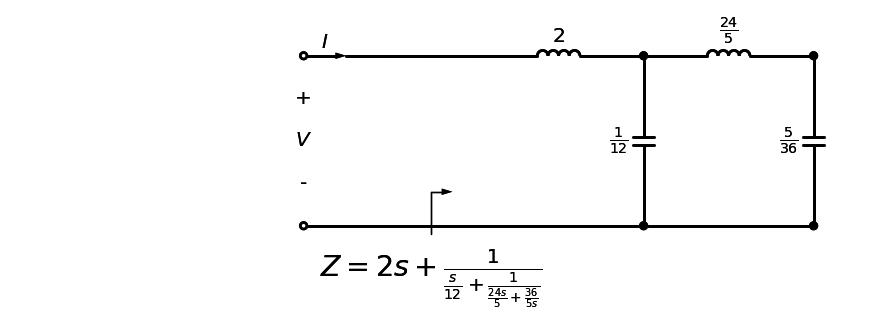

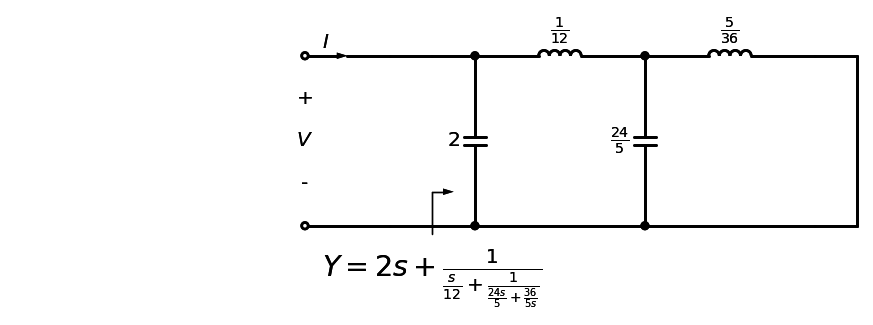

In [7]:

# Implementaremos FF mediante Cauer 1 o remociones continuas en infinito
koo, F_cauer_oo, rem = cauer_LC(FF, remover_en_inf=True)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('F(s)', FF)[1:-1], F_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(koo, z_exc = F_cauer_oo)

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_LC(koo, y_exc = F_cauer_oo)



Se observa, como es de esperarse, que interpretar la inmitancia como impedancia o admitancia utilizando el mismo método, Cauer 1 en este caso, da lugar a redes **duales**.

## Cauer 2: remociones en 0 o DC

Repetimos ahora para remociones de los residuos en 0 Hz, obtendremos dos redes también duales.

<IPython.core.display.Math object>

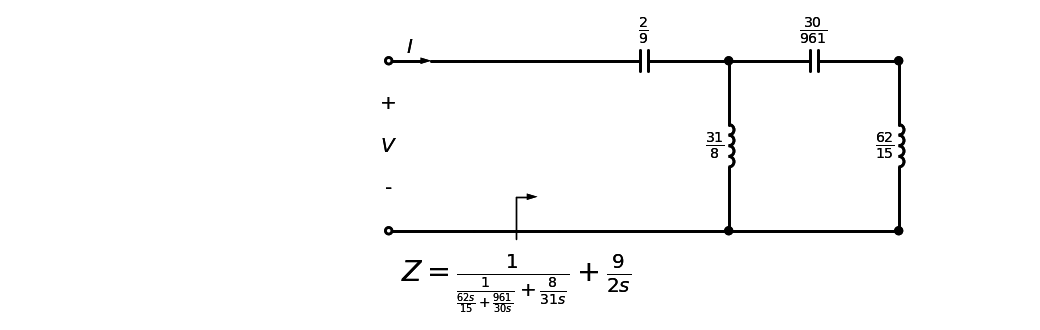

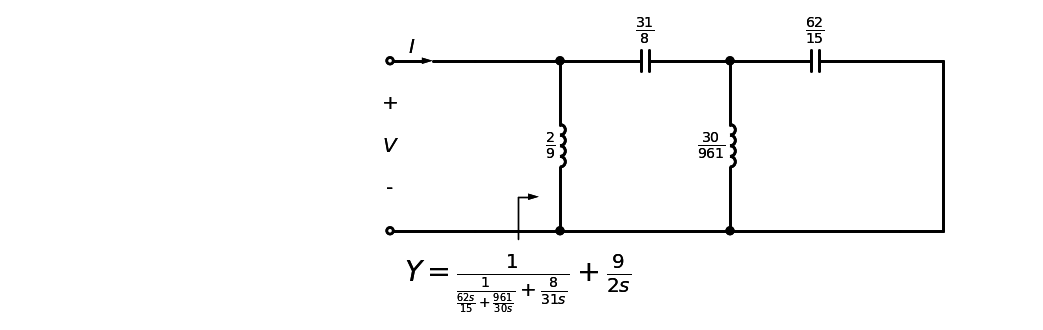

In [8]:

# Implementaremos F mediante Cauer 2 o remociones continuas en cero
k0, F_cauer_0, rem = cauer_LC(FF, remover_en_inf=False)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('F(s)', FF)[1:-1], F_cauer_0 ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(k0, z_exc = F_cauer_0)

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_LC(k0, y_exc = F_cauer_0)



Ambas redes duales, tienen características en común como ser que ambas tienen capacitores en serie e inductores en derivación. Esto contrasta con las redes halladas mediante Cauer 1, donde observamos lo contrario: inductores en serie y capacitores en derivación. Está claro que Cauer 1 da lugar a redes que, en caso **que imaginemos un puerto de salida en el extremo derecho de la red**, serían filtros **pasabajo**, mientras que sintetizar una red mediante Cauer 2 da lugar a una red escalera **pasa-altos**.

Finalmente, decir que habrá redes que al tener la misma función de exitación, cargarán de forma idéntica al puerto de entrada, pero en caso de asumir una eventual transferencia respecto a un puerto en el otro extremo de la red, la transferencia **será complementaria** (pasabajo-pasaalto):

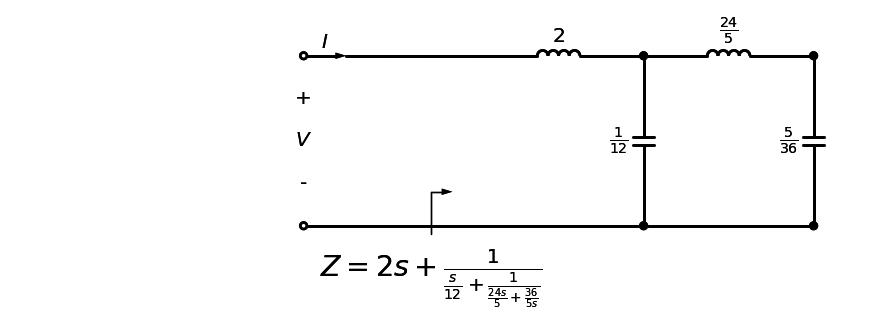

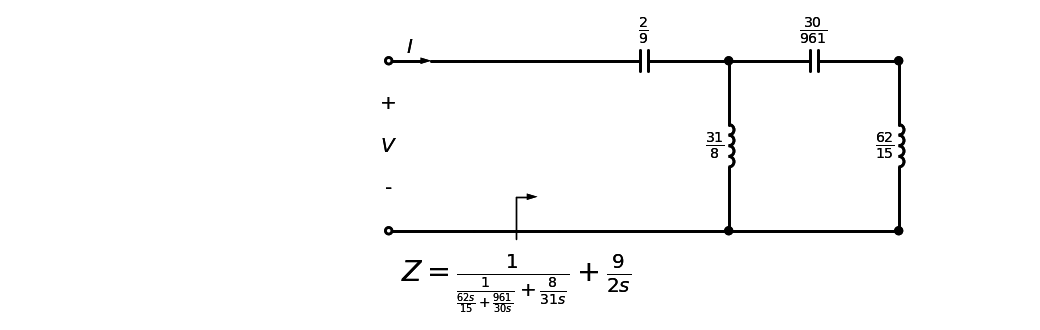

In [9]:
# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(koo, z_exc = F_cauer_oo)

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_LC(k0, z_exc = F_cauer_0)
